In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [6]:
boston = load_boston()

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston.data.shape

(506, 13)

In [11]:
columnNames = boston.feature_names
columnNames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
Data = pd.DataFrame(boston.data, columns=columnNames)
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
Data_Labels = boston.target
Data_Labels.shape

(506,)

In [15]:
Data['PRICE'] = Data_Labels

In [16]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
Data.shape

(506, 14)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Data, Data['PRICE'], test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [19]:
X_temp = X_train.drop('PRICE', axis=1, inplace=False)
X_std = StandardScaler().fit_transform(X_temp)
X = pd.DataFrame(X_std, columns=columnNames)
y=y_train

In [20]:
X_test_temp = X_test.drop('PRICE', axis=1, inplace=False)
X_test_std = StandardScaler().fit_transform(X_test_temp)
X_te = pd.DataFrame(X_test_std, columns=columnNames)
y_te = y_test

In [21]:
clf = SGDRegressor(shuffle=False, learning_rate='invscaling', max_iter=2500)
clf.fit(X,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=2500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
y_pred = clf.predict(X_te)

In [24]:
print("Weights = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weights = [-0.91250884  0.79463157 -0.19380731  0.8531107  -1.8773671   2.52070307
  0.24648617 -2.9260289   2.51317698 -1.6123314  -2.16009111  1.08057799
 -3.90664588]
Y Intercept = [22.41235958]


In [26]:
d2 = {'True Lables': y_te, 'Predicted Labels': y_pred}
df2 = pd.DataFrame(data=d2)
df2.head()

,True Lables,Predicted Labels
463,20.2,22.499918
152,15.3,20.752427
291,37.3,31.829543
183,32.5,30.421366
384,8.8,3.436157


In [27]:
Mean_sq_error = mean_squared_error(y_te, y_pred)
Mean_sq_error

19.153831548327236

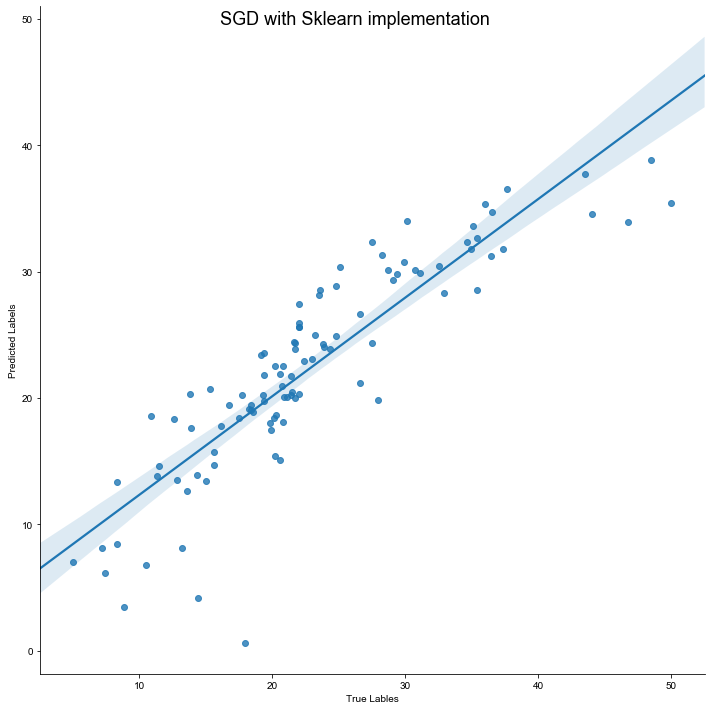

In [29]:
lm2 = sns.lmplot(x='True Lables', y='Predicted Labels', data=df2, size=10)
fig2 = lm2.fig

#add title to the figure
fig2.suptitle('SGD with Sklearn implementation', fontsize=18)

sns.set(font_scale=1.5)